Optimal k: 13


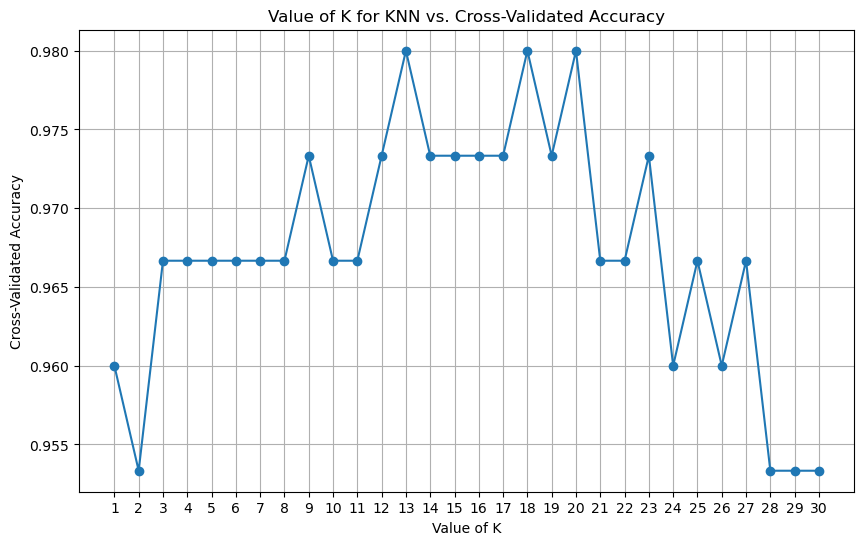

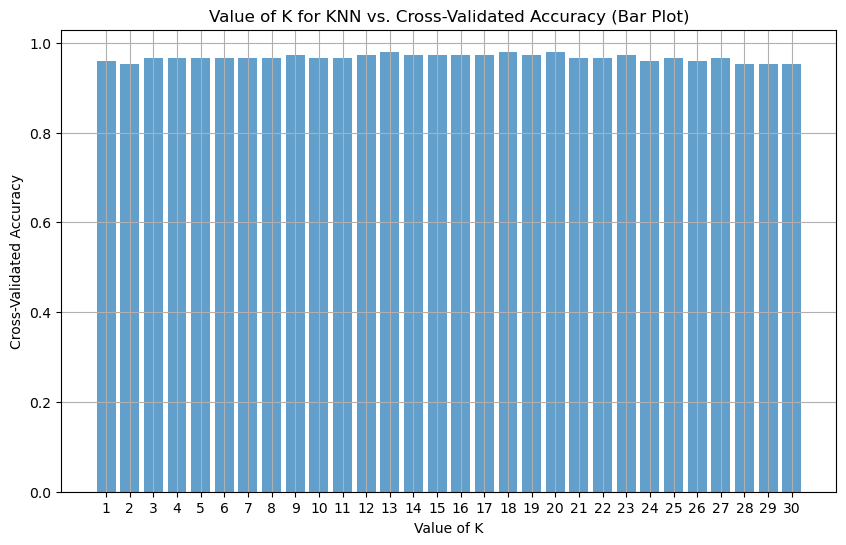

Optimal k (from GridSearchCV): 13
Best Cross-Validated Accuracy (GridSearchCV): 0.9800000000000001


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

#Range for hyperparameter k
k_range = range(1, 31)
accuracy = []

#Loop values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)  # 10-fold cross-validation
    accuracy.append(scores.mean())  # Append mean accuracy to the list

#Determine the optimal k
optimal_k = k_range[np.argmax(accuracy)]
print(f'Optimal k: {optimal_k}')

#Plot Value of K vs Validated Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy, marker='o')
plt.title('Value of K for KNN vs. Cross-Validated Accuracy')
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.grid()

#Save the plot
plt.savefig('knn-1.jpg')
plt.show()

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(k_range, accuracy, alpha=0.7)
plt.title('Value of K for KNN vs. Cross-Validated Accuracy (Bar Plot)')
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.grid()

#Save the plot
plt.savefig('knn2-1.jpg')
plt.show()

#Set parameters for GridSearchCV
param_grid = {'n_neighbors': range(1, 31)}  # k values from 1 to 30

#Create KNN
knn = KNeighborsClassifier()

#Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=10)  # 10-fold cross-validation
grid_search.fit(X, y)

#Print
print(f'Optimal k (from GridSearchCV): {grid_search.best_params_["n_neighbors"]}')
print(f'Best Cross-Validated Accuracy (GridSearchCV): {grid_search.best_score_}')